In [11]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
archivo = 'Train.xlsx'
train_info= pd.read_excel(archivo, sheet_name='trainingRestMex')



In [22]:
train_info.head()

,Title,Opinion,Polarity,Attraction
0,Pésimo lugar,"Piensen dos veces antes de ir a este hotel, te...",1.0,Hotel
1,No vayas a lugar de Eddie,Cuatro de nosotros fuimos recientemente a Eddi...,1.0,Restaurant
2,Mala relación calidad-precio,seguiré corta y simple: limpieza\n- bad. Tengo...,1.0,Hotel
3,Minusválido? ¡No te alojes aquí!,Al reservar un hotel con multipropiedad Mayan ...,1.0,Hotel
4,Es una porqueria no pierdan su tiempo,"No pierdan su tiempo ni dinero, venimos porque...",1.0,Hotel


In [23]:
plot_size = plt.rcParams["figure.figsize"] 
print(plot_size[0]) 
print(plot_size[1])

plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 

8.0
6.0


<AxesSubplot:ylabel='Polarity'>

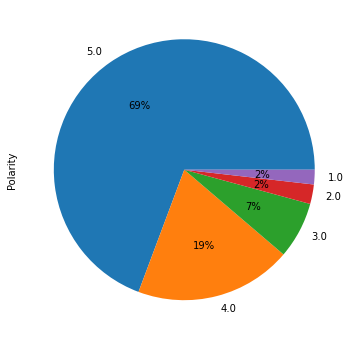

In [26]:
train_info.Polarity.value_counts().plot(kind='pie', autopct='%1.0f%%')

<AxesSubplot:ylabel='Attraction'>

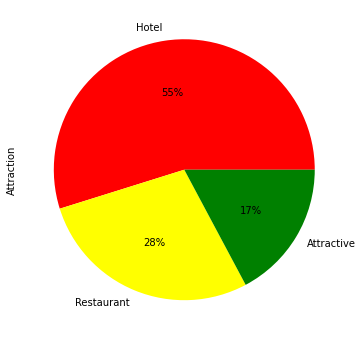

In [28]:
train_info.Attraction.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["red", "yellow", "green"])

<AxesSubplot:xlabel='Attraction'>

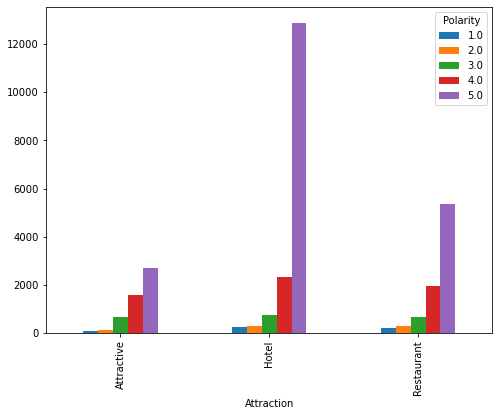

In [30]:
Polarity = train_info.groupby(['Attraction', 'Polarity']).Polarity.count().unstack()
Polarity.plot(kind='bar')

<AxesSubplot:xlabel='Attraction', ylabel='Polarity'>

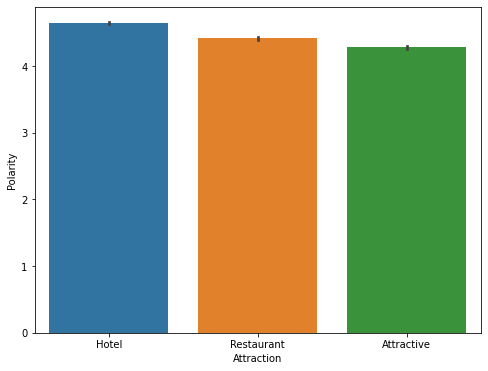

In [31]:
import seaborn as sns

sns.barplot(x='Attraction', y='Polarity' , data=train_info)

In [41]:
features = train_info.iloc[:, 1].values
labels = train_info.iloc[:, 2].values

In [42]:
labels

array([1., 1., 1., ..., 5., 5., 5.])

In [43]:
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)


In [44]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('spanish'))
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [45]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [46]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [47]:
predictions = text_classifier.predict(X_test)

In [48]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[  11    0    3    9   81]
 [   0    5    7   17  116]
 [   3    0   23   39  357]
 [   0    0    2   93 1068]
 [   0    0    2   43 4164]]
              precision    recall  f1-score   support

         1.0       0.79      0.11      0.19       104
         2.0       1.00      0.03      0.07       145
         3.0       0.62      0.05      0.10       422
         4.0       0.46      0.08      0.14      1163
         5.0       0.72      0.99      0.83      4209

    accuracy                           0.71      6043
   macro avg       0.72      0.25      0.26      6043
weighted avg       0.67      0.71      0.62      6043

0.7109051795465828


In [49]:
predictions = text_classifier.predict(X_test)

In [50]:
predictions

array([5., 5., 5., ..., 5., 5., 5.])

In [ ]:
#sdfsdfdsfdsfds